# 1. 선형회귀

## 1-0. 전체적인 회귀 분석 프로세스

**회귀분석 프로세스**
- 사전 검증 → 모델 생성 및 모델 fit → 모델 평가 → 모델 성능 개선

1. 사전 검증
- 데이터 탐색 및 전처리
    - 결측치 처리, 이상치 처리
- 회귀 분석의 기본 가정 6가지 검토

2. 모델 생성 및 모델 fit
- 회귀 모델 생성, 모델 설정, 모델 학습
- 모델의 유의성 검정
    - F-검정, T-검정

3. 모델 성능 평가
- R-squared
- 회귀 분석 후 검증 가능한 가설 검토

4. 모델 성능 개선
- 필요 없는 변수 제거
- 비선형 모델 활용

## 1-1. 다중선형회귀의 수식적 이해
- 가장 일반적인 형태 : $y_i = \beta_0+\beta_1X_{1i}+\beta_2X_{2i}+...\beta_kX_{ki}+\varepsilon_i$
    - $y_i$ : i번째 종속 변수(우리가 관심 있는 값)
    - $X_{1i}, X_{2i}, ... , X_{ki}$ : i번째 y에 대한 여러 개의 설명변수(독립 변수)
    - $\beta_0$ : 절편, 설명변수(X)가 모두 0일 때 y의 값
    - $\beta_1, \beta_2, ..., \beta_k$ : 설명변수에 의한 회귀 계수 (각 변수 X의 영향력, 가중치)
    - $\epsilon_i$  : 오차항
    - 우리가 관심있는 y에 대해, 영향을 줄 것 같은 여러 설명변수들을 채택하여 선형적으로 식을 작성한 모습
- 상수항, 오차항 제외: $y=w_0x_0+w_1x_1+\cdot\cdot\cdot+w_mx_m=\sum_{i=0}^mw_ix_i=w^Tx$
    - 선형회귀식은 결국 종속변수 y에 대한 설명변수의 가중평균
    - 설명변수에 가중치를 곱해 더함으로써 y를 얼마나 잘 설명하는지를 나타냄

## 1-2. 다중선형회귀의 기본가정
***반드시 만족해야 함!***

### 가정1: 선형성(linearity)
 $E(y|X) = \beta_1+\beta_2X_2+...+\beta_nX_n$
- 종속변수와 설명변수 간의 관계가 선형적이어야 함.(위의 형태)

### 가정2: 독립성(Independence)
 $X_i, X_j \ is \ linearly\ independent \ for\ all \ i,j$
- 각각의 설명 변수가 서로 선형독립적이어야 함
- 그렇지 않으면 다중공선성이 있다고 함
    - 다중 공선성: 독립변수들이 서로 강한 상관관계를 가져서, 어떤 변수가 종속 변수에 가장 큰 영향을 주는지 알 수 없는 상태
        - 다중공선성 알아보는 방법: 상관계수, VIF 구해보기
        - 다중공선성 대처법: 변수 제거, 규제 선형 모델, PCA 방법

### 가정3: 오차항의 평균은 0이다(0에 가까워야 한다)
$E(\varepsilon_i|X_i) = 0$
- 오차항 : 실제 값과 예측 값의 차이
- 오차항은 백색 잡음이라고도 하는데, 백색잡음의 성질을 만족하기 위해 이 가정이 필요함
- 백색 잡음: 특정 패턴 없이 랜덤하게 변하는 신호, 오차항의 평균이 0이어야 평균적으로 어느 방향에 치우치지 않고 백색 잡음이 될 수 있음!

### 가정4: 등분산성(Homoscedasticity)
 $Var(\varepsilon_i|X_i) = \sigma^2$
- 오차항의 분산이 일정해야 한다는 가정
- 만약 그렇지 않으면, 이분산성이 있다고 함
    - 특히 횡단면 자료에서 많이 나타남
    - 이 경우 회귀분석의 결과가 정확하지 않을 수 있음
        - 등분산성 가정을 만족하지 않으면, 즉 이분산성을 가지면, 모델의 예측이 일부 구간에서는 매우 정확하지만, 일부 구간에서는 오차가 매우 커질 수 있음
- 등분산성을 알아보는 방법
    1. 잔차의 도표화
    2. 검정

### 가정5: 오차항은 자기상관되어 있지 않다(non-autocorrelation)
 $Cov(\varepsilon_i, \varepsilon_j|X_i) =0$ 
- 오차항의 공분산(Cov)은 항상 0이어야 한다.
    - 두 변수 간의 공분산이 0보다 크면 양의 상관관계
    - 두 변수 간의 공분산이 0보다 작으면 음의 상관관계
    - 두 변수 간의 공분산이 0이면 독립적인 관계
- 오차항의 공분산이 0이 아니면, 자기상관이 있다고 함
    - 자기상관: 한 변수의 현재 값이 과거 값과 상관관계를 가지는 현상
    - 특히 시계열 자료에서 많이 나타남
    - 모델이 데이터를 랜덤하게 예측하는 것이 아니라, 이전 데이터의 패턴을 학습하여 반복적인 오류를 만들어 낼 가능성이 높음
- 자기상관을 알아보는 법
    1. 더빈-왓슨 검정
    2. ACF, PACF 함수 찍어보기

### 가정6(선택): 정규성(normality)
 $\varepsilon_i \sim N(0, \sigma^2)$
- 오차항이 정규분포를 따른다는 가정
- 위배되어도 다중선형회귀분석의 결과에 큰 영향을 주지 않음
- 회귀계수들의 신뢰구간과 p-value를 계산할 때 사용되는 공식은 오차항이 정규분포를 따른다고 가정하고 만들어진 것
- 정규성을 알아보는 법
    1. 샤피로-윌크 검정
    2. 자퀴-베라 검정
    3. Q-Q plot 찍어보기

### 회귀 분석 전 vs 후 검증해야 할 가정 정리

| 기본 가정 | 회귀 분석 전에 검증 가능? | 회귀 분석 후에 검증 가능? | 검증 방법 |
| --- | --- | --- | --- |
| 선형성 | ✅ | ✅ | scattor plot 찍어보기 |
| 독립성 (다중공선성) | ✅ | ✅ | VIF 지수, 상관계수 |
| 오차항 평균이 0이다 | ❌ | ✅ | np.mean(residuals) |
| 등분산성 | ❌ | ✅ | 잔차의 도표화 |
| 오차항 자기상관 없다 | ✅ (회귀 분석 전에는  간접적으로 검증 가능, 분석 후에 최종 검증) | ✅ | Durbin-Watson 검정(분석 후) |
| 정규성 | ❌ | ✅ | Shapiro-Wilk 검증, Q-Q plot |


## 1-3. 회귀분석 평가방법
***회귀선을 데이터와 함께 시각화하거나 통계지표를 이용하면 됨***

### 시각화
|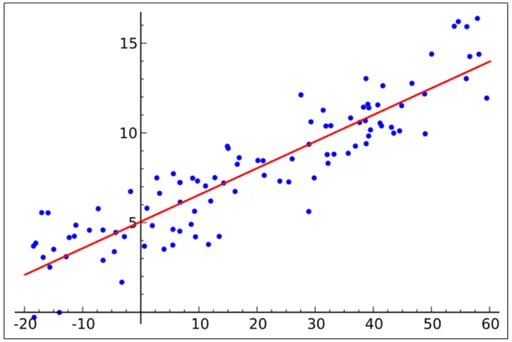|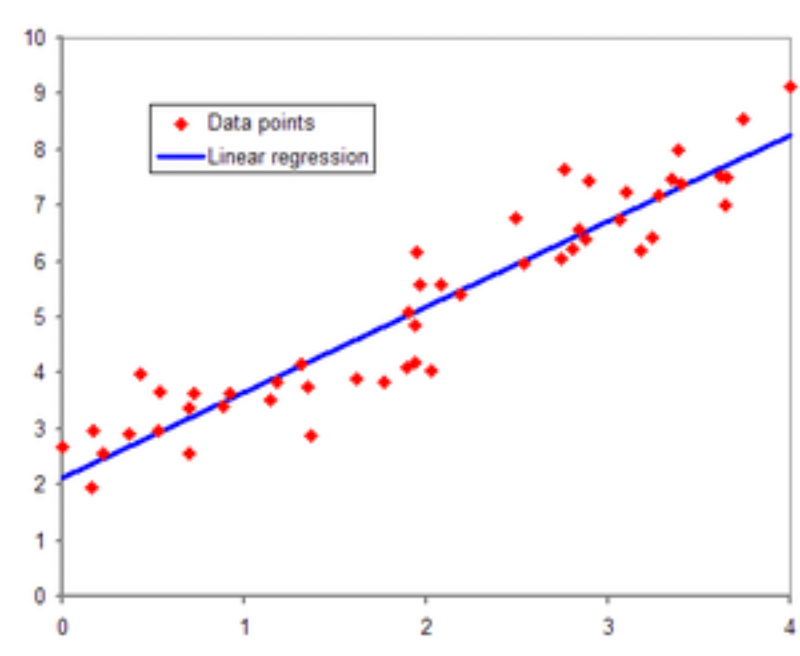|
|---|---|
- 회귀선이 데이터의 전반을 잘 요약함
- 하지만 둘 중 어느 회귀선이 더 잘 요약했는지 객관적 비교 어려움
- 비교를 위해 통계지표를 활용하는 것이 좋음

### 통계지표

#### <span style='background-color:#fff5b1'>모델의 유의성 검정</span>
- Prob(F-statistic), T-statistic 비교  

| 검정 종류 | 검정 대상 | 목적 | 해석 기준 |
| --- | --- | --- | --- |
| F-검정 | **전체 모델** | **회귀 모델이 유의미**한지 검정 | p < 0.05이면 회귀 모델이 유의미하다 |
| T-검정 | **개별 변수** | **특정 독립 변수가 유의미**한지 검정 | p < 0.05이면 해당 변수가 유의미하다 |

##### F-statistic, Prob
- 회귀모델이 유의미한지 검정하는 지표(종속변수 y와 독립변수 X간의 관계가 통계적으로 유의미한지)
    - 귀무가설 $H_0$: 모든 회귀 계수가 0이다.(독립변수들이 종속변수들과 관계가 없다.)
    - 대립가설 $H_1$: 적어도 하나의 회귀 계수는 0이 아니다(독립변수 중 하나 이상이 종속변수에 영향을 준다)
- F-statistic의 값이 클수록 모델이 통계적으로 유의미하다는 것을 의미함
- Prob(F-statistic)은 F-statistic의 p-value값으로, Prob가 0.05보다 작다면, 귀무가설을 기각할 수 있음(회귀모델이 유의미하다)

##### T-statistic
- 각 독립변수가 종속변수 y에 유의미한 영향을 미치는지 판단하는 지표
    - 귀무가설 $H_0$: 해당 변수의 회귀 계수가 0이다(이 변수는 종속변수에 영향을 미치지 않는다)
    - 대립가설 $H_1$: 해당 변수의 회귀 계수가 0이 아니다(이 변수는 종속변수에 유의미한 영향을 준다)
- p-value(P>|t|)를 기준으로 가설 검정을 수행함
    - $X_1$: P>|t| 값이 0.000이므로 0.05보다 작다 → x1이 종속 변수에 유의미한 영향을 미친다.
    - $X_2$: P>|t| 값이 0.031이므로 0.05보다 작다 → x2가 종속 변수에 유의미한 영향을 미친다
    - $X_3$: P>|t| 값이 0.569이므로 0.05보다 크다 → x3가 종속 변수에 유의미한 영향을 미치지 않는다.

#### <span style='background-color:#fff5b1'>모델의 성능평가</span>
- R-squred, Adjusted R-squared, AIC, BIC

##### 결정계수(R-squared, R^2):
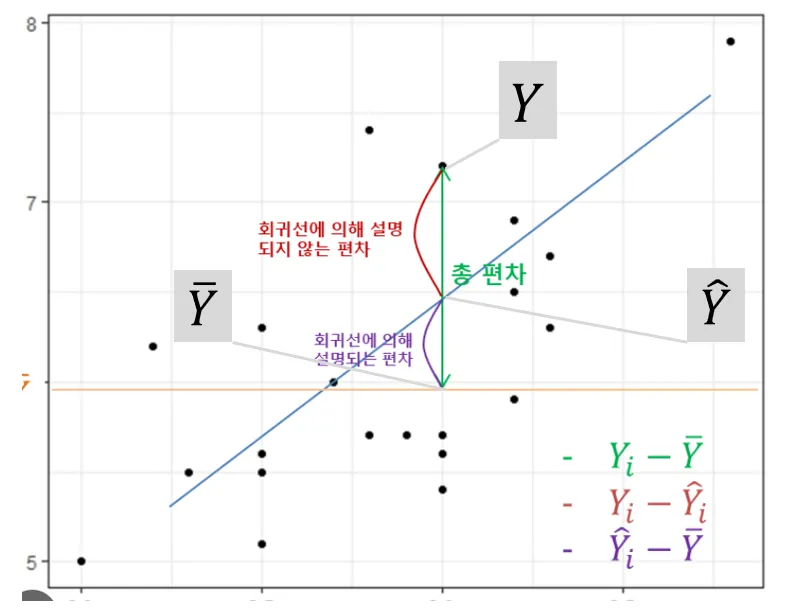
- R^2는 결정계수의 약어, 회귀 분석에서 모델이 설명하는 데이터의 총 변동(평균과의 차이) 중에서 설명된 비율을 나타냄  
→ 데이터의 평균을 예측값으로 사용할 때보다, 모델을 사용할 때 얼마나 더 정확한 예측인지
- $\bar{Y}$: 평균 / $\hat{Y}$: 예측 값 / $Y$: 실제 값
- 위 그림에서는 노란색선으로 표시된 전체 데이터가 평균임
- 초록색 선 : SST / 보라색 선 : SSR / 빨간색 선 : SSE
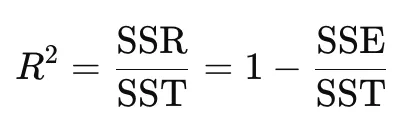
- 모델이 데이터를 얼마나 잘 설명하는지 측정하는 지표, 0과1 사이 값
- 1에 가까울수록, SSR과 SST의 값이 비슷해짐, SSE는 0에 가까워짐 -> 모델이 데이터를 잘 설명한다고 할 수 있음
- R-squared 값이 0이면, 모델이 데이터를 전혀 설명하지 못한다고 할 수 있음

##### 조정된 결정계수(Adjusted R-squared, Adjusted R^2)
- R^2는 독립변수의 개수가 증가하면 증가할수록 자연스레 증가함 -> 데이터와 큰 관련성이 없는 변수를 추가해도 R-square 값은 높아짐
- 따라서 변수의 개수 증가에 덜 민감하도록 조정한 지표가 Adjusted R^2 임.
- $\overline{R}^2 = \frac{SSR}{SST}\frac{n-1}{n-k}=1-(\frac{SSE/(n-k)}{SST/(n-1)})$
- n : 샘플 수(데이터 개수) / k : 독립 변수의 개수
    - 변수를 추가했을 때, **SSE(회귀선에 의해 설명되지 않는 편차)가 충분히 감소**하면, $\frac{SSE}{n-k}$ 가 작아져서 **R-square값이 증가**함.
    - 변수를 추가했을 때, **SSE가 거의 그대로라면(데이터와 관련성이 없는 변수를 추가하면)**, $\frac{SSE}{n-k}$에서 SSE는 그대로고 n-k만 감소하므로 $\frac{SSE}{n-k}$가 커져서 **Adjusted R-square값이 감소**함.
- 이렇게 식에 (n-1/n-k)을 곱한 것을 변수의 개수(k)에 따른 penalty를 부여했다고 표현합니다.

##### AIC, BIC(SC)
- 값이 낮을수록 좋다고 평가함
1. AIC = Akaike information criterion
    - BIC에 비해 복잡성에 대한 패널티가 비교적 작음
2. BIC(SC): SC = Schwarz Criterion, BIC = Bayesian Information Criterion
    - AIC보다 더 엄격한 기준으로, 데이터의 양(n)에 따라 더 강한 패널티를 부과합니다.



# 2. 비선형회귀

## 2-1. 다항식 회귀모델(Polynominal regression model)
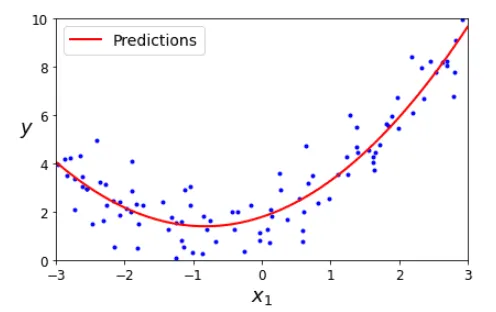
- 기존의 선형 회귀: $Y=a+bX$ 
- 다항식 회귀 모델: $Y=a+bX+cX^2+dX^3+\cdot\cdot\cdot$의 형태로, 독립 변수에 **거듭제곱 항**을 추가하여 데이터의 **곡선적(비선형적) 특성**을 모델링합니다. 
- 사용 방법
    - 기존의 선형 모델 $Y = a + bX$에 대해 $cX^2, dX^3$ 등을 포함하여 모델을 확장
    - 확장한 상태에 선형 회귀를 적용
    - statsmodel의 sm.OLS 혹은 sklearn의 LinearRegression을 사용한다.
- 적합한 상황
    - 관계가 직선적이지 않고 곡선을 그리는 데이터 패턴에서 유용
    - 성장률, 감소율 등이 시간에 따라 변화하는 속도가 다른 경우

- 코드
1. 기존의 변수들을 다항식으로 만드는 코드
```python
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)  
X_poly = poly.fit_transform(X)
```
2. 그 다음에 선형회귀 클래스를 똑같이 이용함
- statsmodels의 sm을 활용
```python
import statsmodels.api as sm

X_poly = sm.add_constant(X_poly)
model = sm.OLS(Y, X_poly).fit()
Y_pred = model.predict(X_poly)
```
- sklearn의 LinearRegression 활용
```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)
```


## 2-2. 지수 회귀모델(Exponention model)
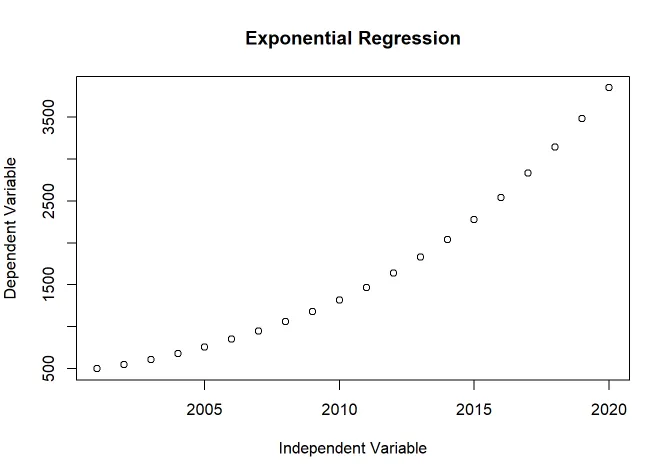
- 종속 변수가 지수적으로 변화하는 관계를 모델링할 때 사용

- 사용 방법
    - 지수함수 형태의 데이터는 $Y = ae^{bX}$의 수식을 따름
    - 이때, $Y=ae^{bX}$의 양변에 로그를 취하면 $\ln Y=\ln a+bX$가 됨
    - 여기서, lnY를 Y’으로, ln a를 a’으로 본다면 Y’=a’+bX가 되어 선형회귀식과 비슷함!
    - → 지수 모델은 종속 변수 Y에 로그를 취한 후 선형 회귀를 적용하면 됨!
    - 이렇게 계산된 Y’은 lnY이므로 기존의 데이터(Y)와 형태가 달라짐
    - → 따라서 원래의 데이터 형태로 복구하기 위해 예측 값에 지수함수$(e^x)$를 적용함.

1. 종속변수 Y에 로그함수를 적용
2. 로그 변환된 Y와 기존의 독립변수 X에 대해 선형 회귀 적용  
→ 모델이 ln Y(로그 변환된 Y)와 X의 선형 관계를 학습
3. Y값을 예측 시, 모델이 예측한 Y값에 지수함수$(e^x)$를 적용하여 로그 변환하기 전 Y로 변형

- 코드
```python
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 지수함수 형태의 임의의 데이터 생성 
np.random.seed(42)
X = np.linspace(1, 10, 20).reshape(-1, 1)
Y = 2 * np.exp(0.8 * X).flatten() + np.random.normal(0, 10, X.shape[0]) 

# 종속변수 Y에 자연 로그 변환
log_Y = np.log(Y) # log_Y: 로그 변환된 Y

# 회귀 모델 학습 (log(Y) = a + bX)
X_const = sm.add_constant(X)  
model = sm.OLS(log_Y, X_const).fit()

# 예측값 변환 (exp를 적용해 원래 스케일로 변환)
log_Y_pred = model.predict(X_const)
Y_pred = np.exp(log_Y_pred) # exp(지수 함수) 적용해서 로그 변환 되기 전의 Y로

# 데이터 시각화
plt.scatter(X, Y, label="Actual Data", color="blue")
plt.plot(X, Y_pred, label="Exponential Fit", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Exponential Regression")
plt.show()
```
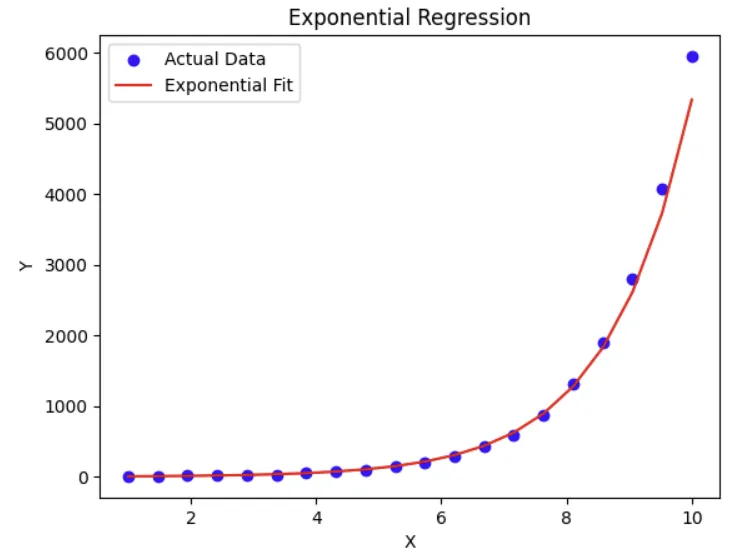
- 파란 점: 실제 데이터 / 빨간 곡선: 모델이 예측한 회귀선

- 적합한 상황
    - 값이 시간에 따라 지수적으로 증가하거나 감소하는 경우 적합
    - 기술 발전, 투자 수익률 증가 등


## 2-3. 로그 회귀모델(log regression model)
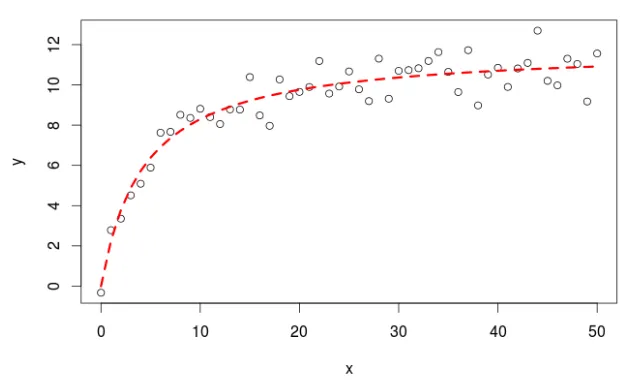
- 종속 변수와 독립 변수 간의 관계가 로그 함수를 통해 더 잘 표현도리 때 사용
- 사용 방법
    1. 독립변수 X에 로그함수를 적용
    2. 선형 회귀를 적용
- 로그함수 형태의 데이터는 $Y=a+b\log(X)$의 수식을 따름. 이것은 Y=a+bX의 선형식에서 X의 자리에 log(X)가 들어간 것임.
- 이렇게 예측된 값은 Y이므로  예측값에 별도의 처리를 하지 않고 그대로 사용할 수 있음 (지수 회귀모델에서는 예측된 값이 Y’이었기 때문에 Y’에 지수함수 연산을 수행했음)
- 코드
```python
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 로그함수 형태의 임의의 데이터 생성 
np.random.seed(42)
X = np.linspace(1, 10, 20).reshape(-1, 1)
Y = 5 + 3 * np.log(X).flatten() + np.random.normal(0, 0.5, X.shape[0]) 

# 독립 변수 X에 자연 로그 변환
log_X = np.log(X)

# 회귀 모델 학습 (Y = a + b * log(X))
log_X_const = sm.add_constant(log_X) 
model = sm.OLS(Y, log_X_const).fit()

# 예측값 계산
Y_pred = model.predict(log_X_const)

# 데이터 시각화
plt.scatter(X, Y, label="Actual Data", color="blue")
plt.plot(X, Y_pred, label="Logarithmic Fit", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Logarithmic Regression")
plt.show()
```
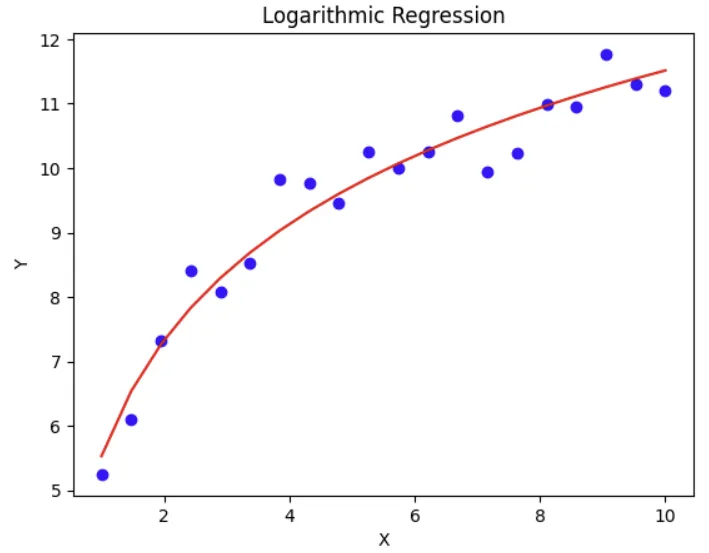
- 파란 점: 실제 데이터 / 빨간 곡선: 모델이 예측한 회귀선
- 적합한 상황
    - 데이터가 초기에 빠르게 증가하고 점차 증가율이 줄어드는 패턴을 보일 때 효과적임
    - 인구 성장, 감염병의 확산과 같이 초기 빠른 증가 후 점진적 감소를 보이는 데이터에 적합함



